add
[1.0, 0.9845219387030056, 5.752300581589478e-09]
tgaus
[-0.05915069181362487, 0.8077838651002816, 0.11696537753907098]
tgaus
[1.0, 1, 1.0]


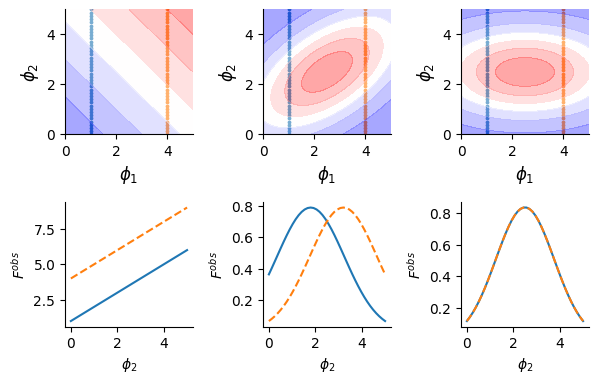

In [2]:
import sys
sys.path.append('../') 
from scipy.spatial.distance import cosine, euclidean, minkowski
from dlim import DLIM
from dlim.utils import Data_model, train, spectral_init, compute_cor_scores
from dlim.sim_data import Simulated
from numpy import mean, sign, linspace, meshgrid
from numpy.random import choice, shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import torch
import matplotlib.pyplot as plt
def compute_cor_scores_col(d1, d2, rho_d, tmp = 1):
    """This only works for only two, TODO update it for more
    """
              
    if rho_d == 'pearson':
        corr = pearsonr(d1, d2)[0]
    elif rho_d == 'cosin':
        corr = 1 - cosine(d1, d2)
    elif rho_d == 'eul':
        corr = np.exp(-euclidean(d1, d2)/tmp)
   
    return  corr

fig, axes = plt.subplots(2, 3, figsize = (6, 4)) 

for id, type_f in enumerate(['add','tgaus', 'tgaus_s']):
    nb_var = 40
    # data = Simulated(nb_var, type_f, comp=False, alpha=145)
    if type_f == 'tgaus_s':
        type_f = 'tgaus'
        alpha = 0 
    else:
        alpha = 145
    A = np.array([1, 4])
    B = np.linspace(0, 5, nb_var)
    data = Simulated(nb_var, type_f, comp=False, alpha=alpha)
    p1, p2,  land = data.sim(A,B)
    axes[0, id].scatter(p1[:, 0], p2[:, 0], s= 3, c = 'C0')
    axes[0, id].scatter(p1[:, 1], p2[:, 0], s= 3, c = 'C1')
    data.plot(axes[0, id])
    axes[1, id].plot(p2[:, 0], land[:,0], c= 'C0')
    axes[1, id].plot(p2[:, 0], land[:,1], c= 'C1', linestyle = '--')
    axes[1, id].set_xlabel(f'$\\phi_2$')
    axes[1, id].set_ylabel("$F^{obs}$")
    cor_l = []
    for rho_d in ['pearson', 'cosin', 'eul']:
        cor = compute_cor_scores_col(land[:, 0], land[:, 1], rho_d= rho_d, tmp = 1)
        cor_l.append(cor)
    print(type_f)
    print(cor_l)
    # axes[1, id].scatter()
for ax_ in axes:
    for el in ["top", "right"]:
        ax_[0].spines[el].set_visible(False)
        ax_[1].spines[el].set_visible(False)
        ax_[2].spines[el].set_visible(False)
fig.tight_layout()
fig.savefig('../draft/img/si_explain_spectral.svg', dpi = 300, transparent=True)